# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7, 4]

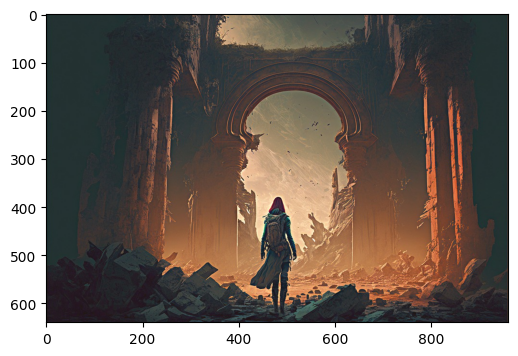

In [65]:
original = cv2.imread('img.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(original)

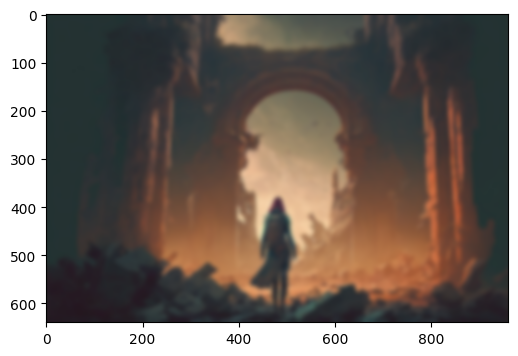

In [66]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring))
unsharp = cv2.GaussianBlur(original, ksize=(0, 0), sigmaX=5)
plt.imshow(unsharp)

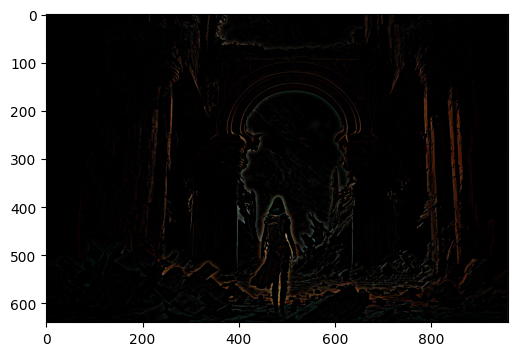

In [67]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = original.astype(np.int16)
diff -= unsharp
# DO NOT CLIP HERE TO AVOID MISREPRESENTATION IN FURTHER OPERATIONS

# It is ok only for ploting
plt.imshow(np.clip(diff, 0, 255))

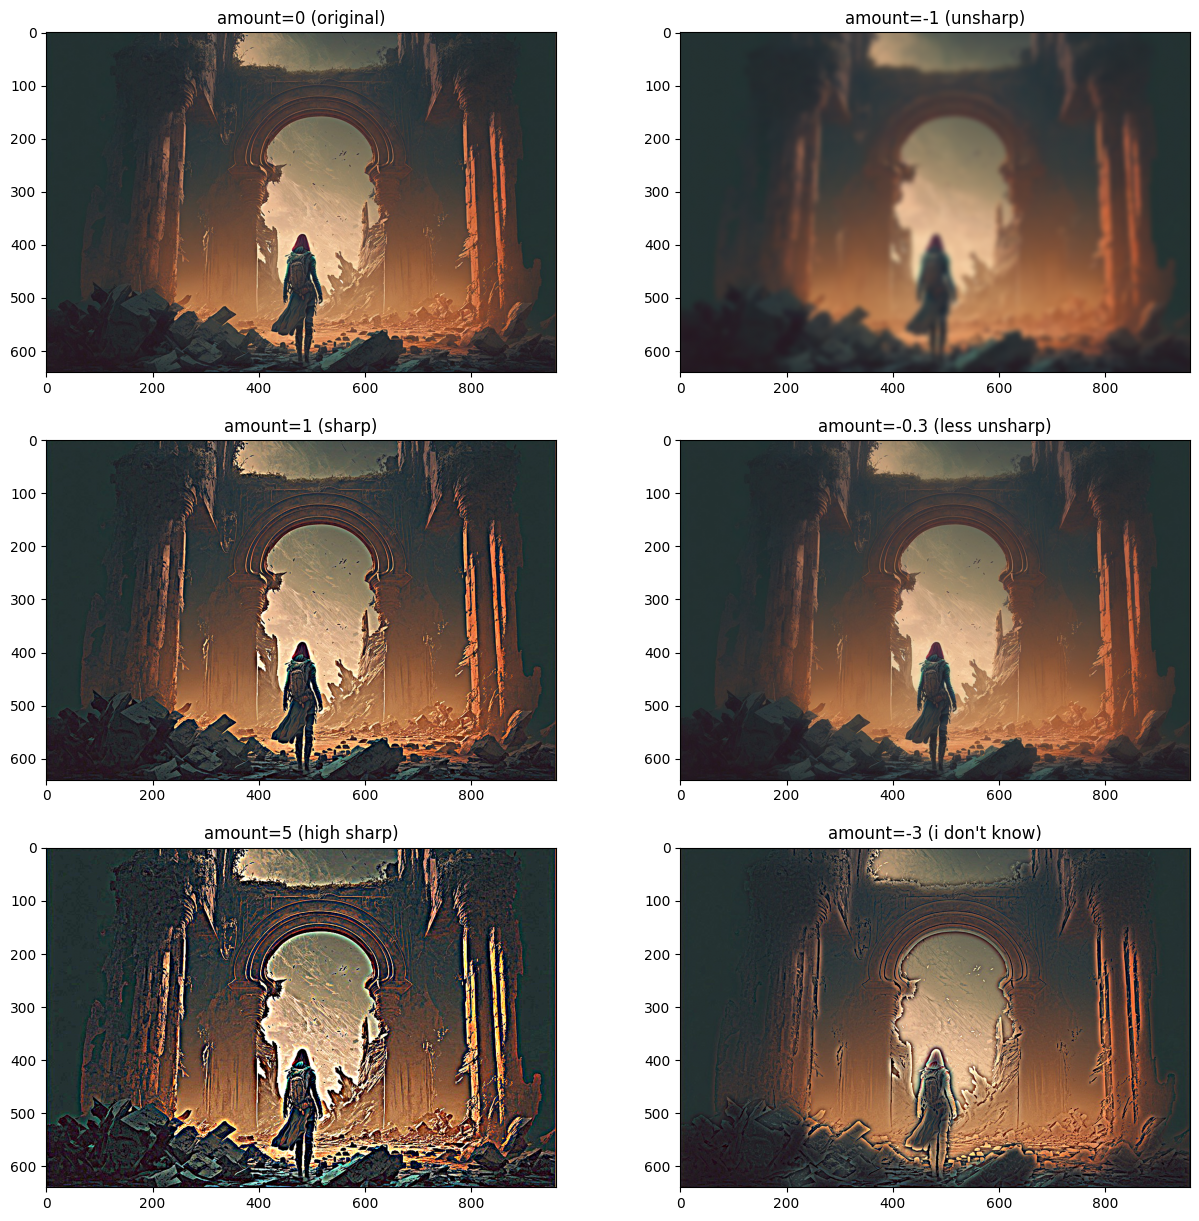

In [68]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
plt.rcParams['figure.figsize'] = [15, 15]
fig, axs = plt.subplots(3, 2)
# normalization of arrays allows to use float amount
original = original / 255
diff = diff / 255
def draw(x, y, title, amount):
    subplot = axs[x, y]
    subplot.set_title(title)
    subplot.imshow(np.clip(original + diff * amount, 0, 1))

draw(0, 0, 'amount=0 (original)', 0)
draw(0, 1, 'amount=-1 (unsharp)', -1)
draw(1, 0, 'amount=1 (sharp)', 1)
draw(1, 1, 'amount=-0.3 (less unsharp)', -0.3)
draw(2, 0, 'amount=5 (high sharp)', 5)
draw(2, 1, 'amount=-3 (i don\'t know)', -3)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

There are several "critical" values for it. 

* If it equels -1 - we receive unsharp image with the same sigma
* -1 < amount < 0 - we can decrease sigmas influence to the original image.
* If it equels 0 - we receive the original image
* amount > 0 - we will receive a sharpening effect that is proportional to the value of this parameter.
* If amount < -1. I'll be honest. I cant describe meaning of this effect. We'll receive some kind of negatives but they haven't any special matter. 